# Calculate Curvature

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, filters, measure, segmentation, feature, morphology
from scipy import ndimage as ndi

C:\Users\nnafar\Anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
# Load image
image = io.imread('blobs.tif', plugin="tifffile")

These lines perform preprocessing steps on the loaded image to prepare it for segmentation.

First, a Gaussian filter is applied to the image to remove noise and smooth the edges using the filters.gaussian() function.

Next, Canny edge detection is applied to the smoothed image to detect the edges using the feature.canny() function.

The edges are then dilated using a disk-shaped structuring element with radius 2 pixels to connect nearby edges using the morphology.dilation() function.

Holes inside the objects are filled using binary hole filling with the ndi.binary_fill_holes() function.

Small objects with a size less than 200 pixels are removed using the morphology.remove_small_objects()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, filters, measure, segmentation, feature, morphology
from scipy import ndimage as ndi

In [ ]:
# Load image
image = io.imread('blobs.tif', plugin="tifffile")

In [8]:
# Define function to calculate curvature
def calculate_curvature(points):
    '''
    Calculates the curvature of a curve defined by a set of points.

    Input:
        points (NumPy array): A (n,2) numpy array of (x,y) coordinates.

    Returns:
        NumPy array (n,) of curvatures.
    '''
    dx_dt = np.gradient(points[:, 1])
    dy_dt = np.gradient(points[:, 0])
    d2x_dt2 = np.gradient(dx_dt)
    d2y_dt2 = np.gradient(dy_dt)

    curvature = (dx_dt * d2y_dt2 - dy_dt * d2x_dt2) / (dx_dt**2 + dy_dt**2)**1.5
    return curvature

C:\Users\nnafar\AppData\Local\Temp\ipykernel_2764\354205009.py:8: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
  local_maxi = feature.peak_local_max(distance, indices=False, footprint=np.ones((3, 3)), labels=cleaned_edges) #


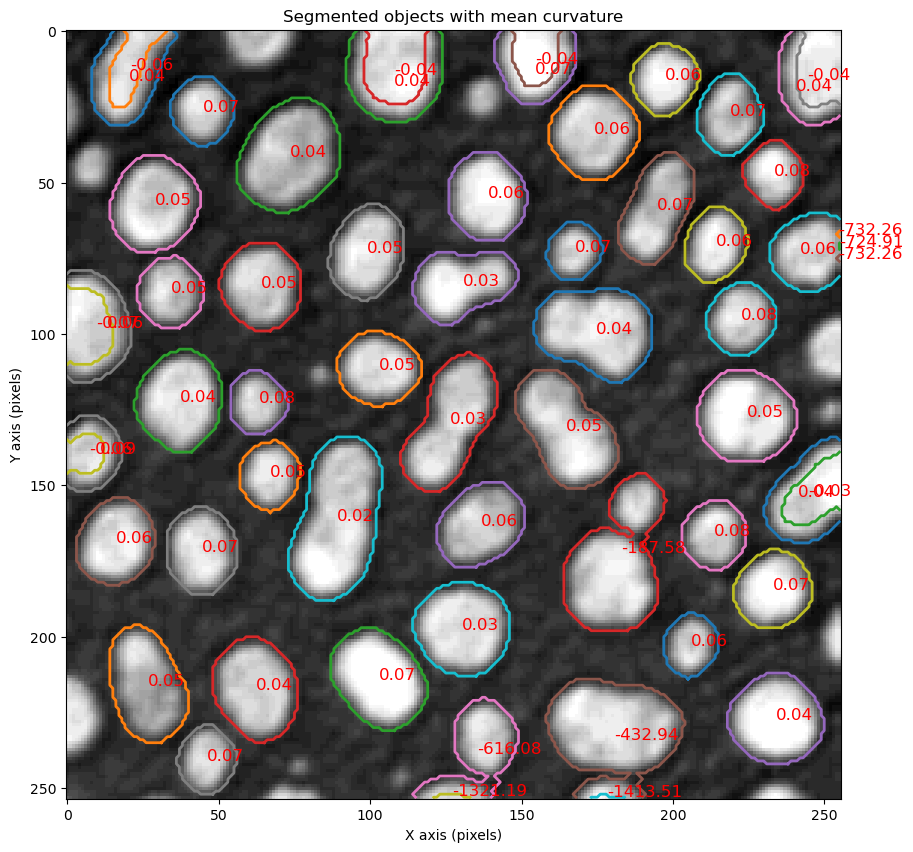

In [22]:
# Preprocessing
smooth_image = filters.gaussian(image, sigma=3)                                                               # apply guasuan filter to remove noise and smooth the edges
edges = feature.canny(smooth_image)                                                                           # defines edges using Canny edge detection
dilated_edges = morphology.dilation(edges, selem=morphology.disk(2))                                          # dilates edges using a disk-shaped structuring element with radius 2 pixels to connect nearby edges
filled_edges = ndi.binary_fill_holes(dilated_edges)                                                           # holes inside the objects are filled
cleaned_edges = morphology.remove_small_objects(filled_edges, min_size=200)                                   # removes objects smaller than 200 pixels
distance = ndi.distance_transform_edt(cleaned_edges)                                                          #
local_maxi = feature.peak_local_max(distance, indices=False, footprint=np.ones((3, 3)), labels=cleaned_edges) # 
markers = ndi.label(local_maxi)[0]
labels = segmentation.watershed(-distance, markers, mask=cleaned_edges)

# Find the contours of the segmented objects
contour_threshold = 0.8
contours = measure.find_contours(labels, contour_threshold)

# Calculate the curvature of each contour and its mean curvature
curvatures = [calculate_curvature(contour) for contour in contours]
mean_curvatures = [np.mean(curv) for curv in curvatures]

# Plot the segmented objects with their mean curvature
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(image, cmap='gray')

for contour, mean_curv in zip(contours, mean_curvatures):
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)
    centroid = np.mean(contour, axis=0)
    ax.annotate(f"{mean_curv:.2f}", (centroid[1], centroid[0]), color='red', fontsize=12)

# Add labels and titles to the plot
ax.set_xlabel('X axis (pixels)')
ax.set_ylabel('Y axis (pixels)')
ax.set_title('Segmented objects with mean curvature')

plt.show()